In [1]:
# load libraries for data processing
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import chemometrics as cm
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
from chemometrics.mcr import McrAR
import chemometrics.mcr.constraint as constraint

In [27]:
# Get CSV files list from a folder
path = 'f:/GAC_KSY/spectrum/1_amaranth/data/NIR_Gachon_amaranth'
mat_files = glob.glob(path + "/*.xlsx")
df_list = (pd.read_excel(file) for file in mat_files)
df = pd.concat(df_list, ignore_index=False, axis = 1, join = "outer")
# import data into dict
data = {}
for file in mat_files:
    data[file.split("/")[-1].replace(".xlsx","").replace('NIR_Gachon_amaranth\\Gachon_','')] = pd.read_excel(file, index_col=0)



In [8]:
# convert to numpy array for easy handling with chemometrics
D, C, S = [data[key].values for key in data]

# store wavenumbers and names of used carbohydrates
wavenumbers = pd.to_numeric(data[files[0]].columns.values)
# substance_names = data[files[2]].columns


,Cm-1,E22_001_230503_145845.0000,E22_001_230503_145845.0001,E22_001_230503_145845.0002,E24_001_230503_150157.0000,E24_001_230503_150157.0001,E24_001_230503_150157.0002,E26_001_230503_150451.0000,E26_001_230503_150451.0001,E26_001_230503_150451.0002,...,O62_001_230503_153710.0002,O855_001_230503_154128.0000,O855_001_230503_154128.0001,O855_001_230503_154128.0002,O875_001_230503_154319.0000,O875_001_230503_154319.0001,O875_001_230503_154319.0002,O946_001_230503_154755.0000,O946_001_230503_154755.0001,O946_001_230503_154755.0002
0,10970.530867,0.197607,0.197927,0.198099,0.182256,0.182414,0.182606,0.200134,0.200721,0.200298,...,0.151266,0.158083,0.158216,0.158251,0.175048,0.175038,0.174626,0.141093,0.141490,0.141691
1,10955.101147,0.197242,0.197402,0.197841,0.181657,0.181740,0.182109,0.199431,0.200034,0.199653,...,0.151189,0.157910,0.158124,0.158135,0.174979,0.175047,0.174520,0.140923,0.141355,0.141693
2,10939.671427,0.196719,0.196778,0.197126,0.180829,0.180931,0.181370,0.198693,0.199047,0.198761,...,0.150848,0.157706,0.157792,0.157923,0.174699,0.174814,0.174315,0.140685,0.141066,0.141460
3,10924.241707,0.195919,0.195988,0.196143,0.179886,0.180000,0.180507,0.197866,0.197987,0.197752,...,0.150262,0.157379,0.157280,0.157573,0.174225,0.174387,0.173901,0.140272,0.140575,0.140830
4,10908.811987,0.195174,0.195354,0.195458,0.179197,0.179310,0.179793,0.197149,0.197276,0.197034,...,0.149861,0.157072,0.157008,0.157348,0.173879,0.174191,0.173599,0.139919,0.140191,0.140243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,3950.008301,0.600930,0.601287,0.601076,0.610665,0.610461,0.610915,0.601049,0.601094,0.601347,...,0.543333,0.585560,0.584235,0.583357,0.517207,0.517224,0.516906,0.543652,0.543474,0.543317
456,3934.578581,0.594215,0.594578,0.594387,0.603448,0.603163,0.603601,0.595100,0.595092,0.595347,...,0.539199,0.580524,0.579174,0.578244,0.514410,0.514481,0.514095,0.539836,0.539670,0.539504
457,3919.148861,0.586999,0.587420,0.587260,0.595472,0.595188,0.595554,0.588782,0.588782,0.589013,...,0.534058,0.574513,0.573158,0.572191,0.510454,0.510558,0.510169,0.535062,0.534916,0.534780
458,3903.719141,0.579951,0.580424,0.580284,0.587482,0.587240,0.587558,0.582641,0.582701,0.582884,...,0.528444,0.568192,0.566848,0.565861,0.505909,0.506040,0.505691,0.529785,0.529655,0.529564


In [28]:
df

,Cm-1,E46_res32_001_230428_104059.0000,E46_res32_001_230428_104059.0001,E46_res32_001_230428_104059.0002,E47_res32_001_230428_105353.0000,E47_res32_001_230428_105353.0001,E47_res32_001_230428_105353.0002,O46_res32_001_230428_103400.0000,O46_res32_001_230428_103400.0001,O46_res32_001_230428_103400.0002,...,E096_230612_140148.0002,E097_230612_105205.0000,E097_230612_105205.0001,E097_230612_105205.0002,E098_230612_134546.0000,E098_230612_134546.0001,E098_230612_134546.0002,E099_230612_102805.0000,E099_230612_102805.0001,E099_230612_102805.0002
0,10970.530867,0.121523,0.121405,0.121640,0.121868,0.122461,0.122244,0.118565,0.118703,0.118586,...,0.080352,0.074843,0.074435,0.073228,0.065643,0.063586,0.063194,0.162471,0.159963,0.160196
1,10955.101147,0.121347,0.121314,0.121452,0.121796,0.122201,0.122068,0.118740,0.118660,0.118654,...,0.077482,0.072166,0.071755,0.071668,0.061836,0.060386,0.060514,0.160218,0.156927,0.158835
2,10939.671427,0.121076,0.120975,0.121084,0.121387,0.121861,0.121773,0.118717,0.118434,0.118551,...,0.075897,0.070273,0.069396,0.070066,0.059051,0.057953,0.058589,0.158070,0.154932,0.157877
3,10924.241707,0.120820,0.120503,0.120659,0.120852,0.121499,0.121332,0.118315,0.118075,0.118219,...,0.076039,0.070577,0.068979,0.069447,0.058847,0.057704,0.058680,0.157194,0.155207,0.158247
4,10908.811987,0.120748,0.120305,0.120461,0.120614,0.121411,0.121032,0.117992,0.117877,0.118053,...,0.076149,0.071938,0.070564,0.069569,0.060002,0.058691,0.059890,0.157546,0.156293,0.159308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,3950.008301,0.519280,0.519421,0.519507,0.472979,0.473162,0.473092,0.496362,0.496155,0.496199,...,0.510427,0.668539,0.667671,0.668592,0.545399,0.545709,0.546074,0.773037,0.774019,0.773551
456,3934.578581,0.512668,0.512835,0.512946,0.468480,0.468720,0.468616,0.491296,0.491132,0.491154,...,0.505805,0.661290,0.660395,0.661325,0.539620,0.539878,0.540593,0.766364,0.767266,0.767136
457,3919.148861,0.505547,0.505721,0.505867,0.463461,0.463725,0.463628,0.485448,0.485285,0.485309,...,0.500474,0.653435,0.652562,0.653612,0.533630,0.533669,0.534620,0.759134,0.759616,0.759932
458,3903.719141,0.498406,0.498557,0.498740,0.458382,0.458616,0.458543,0.479078,0.478915,0.478950,...,0.495005,0.645745,0.644904,0.646125,0.527695,0.527547,0.528580,0.751772,0.751993,0.752301


array([10970.53086662, 10955.1011467 , 10939.67142677, 10924.24170685,
       10908.81198692, 10893.382267  , 10877.95254707, 10862.52282715,
       10847.09310722, 10831.6633873 , 10816.23366737, 10800.80394745,
       10785.37422752, 10769.9445076 , 10754.51478767, 10739.08506775,
       10723.65534782, 10708.2256279 , 10692.79590797, 10677.36618805,
       10661.93646812, 10646.5067482 , 10631.07702827, 10615.64730835,
       10600.21758842, 10584.7878685 , 10569.35814857, 10553.92842865,
       10538.49870872, 10523.0689888 , 10507.63926888, 10492.20954895,
       10476.77982903, 10461.3501091 , 10445.92038918, 10430.49066925,
       10415.06094933, 10399.6312294 , 10384.20150948, 10368.77178955,
       10353.34206963, 10337.9123497 , 10322.48262978, 10307.05290985,
       10291.62318993, 10276.19347   , 10260.76375008, 10245.33403015,
       10229.90431023, 10214.4745903 , 10199.04487038, 10183.61515045,
       10168.18543053, 10152.7557106 , 10137.32599068, 10121.89627075,
      

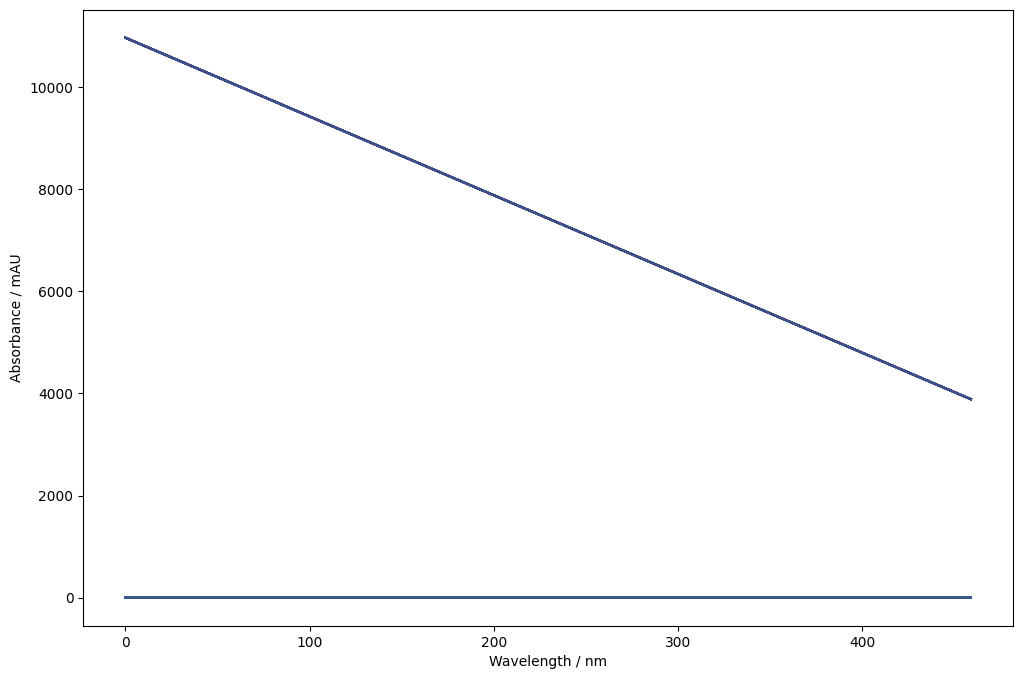

Text(0, 0.5, '$d^2A/dl^2$ / $mAU/nm^2$')

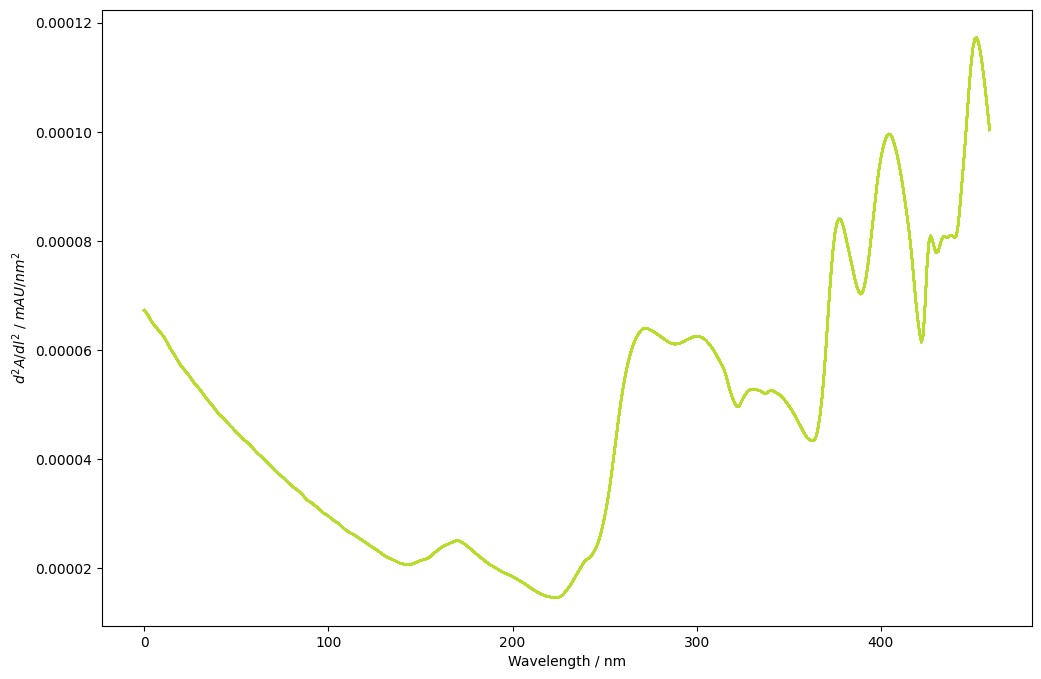

In [36]:
X_deriv = cm.Whittaker(constraint_order=3, deriv=2).fit_transform(X)

fig = plt.figure(figsize=(12, 8))
lines = cm.plot_colored_series(X_deriv,reference=Y[:, 0])
plt.xlabel('Wavelength / nm')
plt.ylabel('$d^2A/dl^2$ / $mAU/nm^2$')